In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # using the covariance matrix by default, because sklearn.decomposition.PCA computes PCA using the covariance
from fredapi import Fred

In [9]:
# setting seed for reproducibility
np.random.seed(42) # why 42?, its an inside joke

# parameters
n_obs = 200
n_vars = 5
mu = 0
sigma = 0.01

# generating uncorrelated Gaussian random variables
task_three_data = np.random.normal(mu, sigma, size=(n_obs, n_vars))

df = pd.DataFrame(task_three_data, columns=[f'Var{i+1}' for i in range(n_vars)])

In [44]:
df.head()

,Var1,Var2,Var3,Var4,Var5
0,0.004967,-0.001383,0.006477,0.015230,-0.002342
1,-0.002341,0.015792,0.007674,-0.004695,0.005426
2,-0.004634,-0.004657,0.002420,-0.019133,-0.017249
3,-0.005623,-0.010128,0.003142,-0.009080,-0.014123
4,0.014656,-0.002258,0.000675,-0.014247,-0.005444


In [56]:
# run PCA on the synthetic data
pca = PCA()
pca.fit(df)

# variance explained by each component
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.24505332, 0.20890343, 0.198169  , 0.18640823, 0.16146602])

In [58]:
# put results in a neat table
for i, var in enumerate(explained_variance, start=1):
    print(f"Component {i}: {var:.4f} ({var*100:.2f}% of variance)")

Component 1: 0.2451 (24.51% of variance)
Component 2: 0.2089 (20.89% of variance)
Component 3: 0.1982 (19.82% of variance)
Component 4: 0.1864 (18.64% of variance)
Component 5: 0.1615 (16.15% of variance)


Because our five variables are just independent noise, PCA doesn’t really find a strong underlying factor. Instead, it spreads the variance out pretty evenly. Component 1 grabs about a quarter of the variance, Components 2 and 3 take a fifth each, and the last two pick up the rest. No single component dominates, which makes sense, since nothing in the data is really correlated or structured.

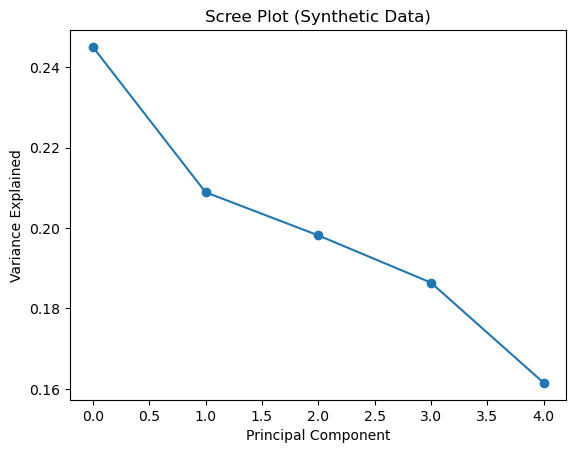

In [16]:
plt.plot(explained_variance, marker='o')
plt.title("Scree Plot (Synthetic Data)")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

In [36]:
# FRED API key
fred = Fred(api_key="use_your_api_key") # please do not use my api key

# 5 Treasury yields
series_ids = ['DGS3MO', 'DGS1', 'DGS5', 'DGS10', 'DGS30']
names = ['3M', '1Y', '5Y', '10Y', '30Y']

# Fetching data
yields = pd.DataFrame({name: fred.get_series(sid, 
                                             observation_start="2025-01-02", 
                                             observation_end="2025-07-03") 
                       for name, sid in zip(names, series_ids)})

# Cleaning up
yields.index = pd.to_datetime(yields.index)
yields = yields.dropna()

# Computing daily yield changes
task_three = yields.diff().dropna()
# task_three.to_csv('task_three.csv', index=True)

In [38]:
# task_three = pd.read_csv('task_three.csv')
task_three.head()

,3M,1Y,5Y,10Y,30Y
2025-01-03,-0.02,0.01,0.03,0.03,0.03
2025-01-06,0.01,-0.01,0.01,0.02,0.03
2025-01-07,0.00,0.02,0.04,0.05,0.06
2025-01-08,0.00,0.00,-0.01,0.00,0.00
2025-01-09,0.00,-0.03,0.01,0.01,0.01


In [52]:
# run PCA on the synthetic data
pca = PCA()
pca.fit(task_three)

# variance explained by each component
tt_explained_variance = pca.explained_variance_ratio_
tt_explained_variance

array([0.84410155, 0.11916809, 0.01819397, 0.01497547, 0.00356092])

In [54]:
# put results in a neat table
for i, var in enumerate(tt_explained_variance, start=1):
    print(f"Component {i}: {var:.4f} ({var*100:.2f}% of variance)")

Component 1: 0.8441 (84.41% of variance)
Component 2: 0.1192 (11.92% of variance)
Component 3: 0.0182 (1.82% of variance)
Component 4: 0.0150 (1.50% of variance)
Component 5: 0.0036 (0.36% of variance)


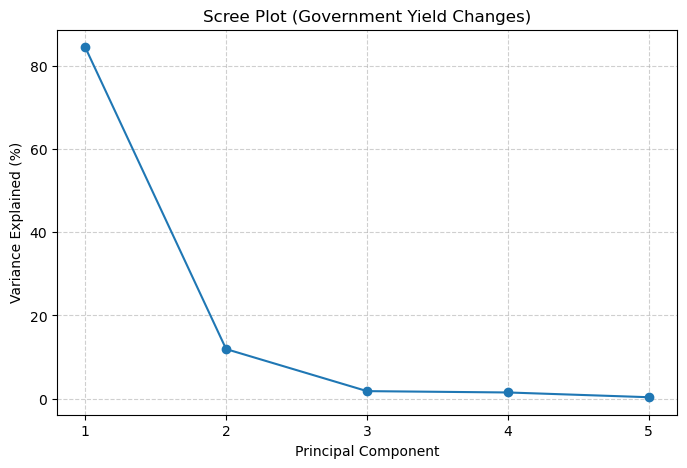

In [48]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(tt_explained_variance)+1), tt_explained_variance*100, marker='o')
plt.title("Scree Plot (Government Yield Changes)")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.xticks(range(1, len(tt_explained_variance)+1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Conclusion

When we look at the two scree plots, the difference is obvious. For the randomly generated data, the variance is evenly spread across all five components, Component 1 only explains about 25%, and the rest are similar. That makes sense because these were just random, uncorrelated numbers, so there’s no real pattern to capture. For the government yield changes, it’s a total different story, the first component explains over 84% of the variance, the second about 12%, and the rest hardly matter. This shows that most of the yield movements are driven by one main factor basically the overall level of interest rates, with a bit of influence from slope or curvature, the synthetic data looks flat and random, while the real yields clearly have structure that PCA can pick up.